In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('diabetic_data.csv')
print(df.shape)
df.head()

(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Step 1: Load and Inspect Dataset



In [3]:
print("Shape of dataset:", df.shape)
print("\nColumns in dataset:\n", df.columns.tolist())

# View first few rows
df.head()

Shape of dataset: (101766, 50)

Columns in dataset:
 ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# Basic information about columns and datatypes
df.info()

# Count missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("\nTop 10 columns with missing values:\n", missing.head(10))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
# Count how many "?" entries are in each column
question_marks = (df == '?').sum().sort_values(ascending=False)
print("\nColumns with '?' values:\n", question_marks.head(10))



Columns with '?' values:
 weight               98569
medical_specialty    49949
payer_code           40256
race                  2273
diag_3                1423
diag_2                 358
diag_1                  21
encounter_id             0
tolazamide               0
glyburide                0
dtype: int64


In [5]:
columns_to_check = ['race', 'gender', 'age', 'admission_type_id', 
                    'discharge_disposition_id', 'admission_source_id']

for col in columns_to_check:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())



--- race ---
race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

--- gender ---
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

--- age ---
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

--- admission_type_id ---
admission_type_id
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64

--- discharge_disposition_id ---
discharge_disposition_id
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14


In [6]:
df['readmitted'].value_counts(normalize=True) * 100


readmitted
NO     53.911916
>30    34.928169
<30    11.159916
Name: proportion, dtype: float64

In [7]:
import sys
print(sys.executable)




C:\Program Files\Python312\python.exe


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


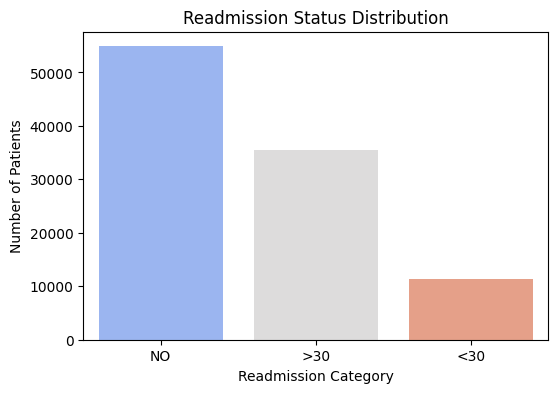

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='readmitted', data=df, hue='readmitted', palette='coolwarm', legend=False)
plt.title("Readmission Status Distribution")
plt.xlabel("Readmission Category")
plt.ylabel("Number of Patients")
plt.show()


In [11]:
df.describe().T.head(10)


,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [12]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)


Number of duplicate rows: 0


In [13]:
import numpy as np

# Replace '?' placeholders with NaN
df = df.replace('?', np.nan)

# Verify replacement
df.isnull().sum().sort_values(ascending=False).head(10)


weight               98569
max_glu_serum        96420
A1Cresult            84748
medical_specialty    49949
payer_code           40256
race                  2273
diag_3                1423
diag_2                 358
diag_1                  21
encounter_id             0
dtype: int64

In [14]:
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

print("Columns with missing values:\n")
print(missing_percentage)


Columns with missing values:

weight               96.858479
max_glu_serum        94.746772
A1Cresult            83.277322
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
dtype: float64


In [15]:
# Drop columns with too many missing values
df = df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)

print("Remaining columns:", len(df.columns))


Remaining columns: 47


In [16]:
# Drop duplicate rows
before = len(df)
df = df.drop_duplicates()
after = len(df)

print(f"Removed {before - after} duplicate rows")


Removed 0 duplicate rows


In [17]:
# Check gender values
print(df['gender'].unique())

# Remove invalid gender values like 'Unknown/Invalid'
df = df[df['gender'] != 'Unknown/Invalid']


['Female' 'Male' 'Unknown/Invalid']


In [18]:
# Convert age ranges (e.g., [70-80)) into midpoint values (e.g., 75)
df['age'] = df['age'].str.replace('[', '').str.replace(')', '').str.replace('+', '')
df['age'] = df['age'].str.split('-').apply(lambda x: np.mean([int(i) for i in x]))

df['age'].head()


0     5.0
1    15.0
2    25.0
3    35.0
4    45.0
Name: age, dtype: float64

In [19]:
# Simplify the 'readmitted' column into binary form
df['readmitted_binary'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# View distribution
df['readmitted_binary'].value_counts(normalize=True) * 100


readmitted_binary
0    88.839755
1    11.160245
Name: proportion, dtype: float64

In [20]:
# Fill missing race values with 'Unknown'
df['race'] = df['race'].fillna('Unknown')

print(df['race'].value_counts())


race
Caucasian          76099
AfricanAmerican    19210
Unknown             2271
Hispanic            2037
Other               1505
Asian                641
Name: count, dtype: int64


In [22]:
# Standardize text columns
text_columns = df.select_dtypes(include='object').columns

for col in text_columns:
    df[col] = df[col].astype(str).str.lower().str.strip()


In [23]:
# Show shape and missing value summary after cleaning
print("Final dataset shape:", df.shape)
print("\nRemaining missing values:\n", df.isnull().sum().sum())

# Preview final dataset
df.head()


Final dataset shape: (101763, 48)

Remaining missing values:
 0


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
0,2278392,8222157,caucasian,female,5.0,6,25,1,1,41,0,1,0,0,0,250.83,nan,nan,1,nan,nan,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,0
1,149190,55629189,caucasian,female,15.0,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,nan,nan,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,up,no,no,no,no,no,ch,yes,>30,0
2,64410,86047875,africanamerican,female,25.0,1,1,7,2,11,5,13,2,0,1,648,250,v27,6,nan,nan,no,no,no,no,no,no,steady,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,0
3,500364,82442376,caucasian,male,35.0,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,nan,nan,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,up,no,no,no,no,no,ch,yes,no,0
4,16680,42519267,caucasian,male,45.0,1,1,7,1,51,0,8,0,0,0,197,157,250,5,nan,nan,no,no,no,no,no,no,steady,no,no,no,no,no,no,no,no,no,no,steady,no,no,no,no,no,ch,yes,no,0


In [25]:
df.to_csv('cleaned_diabetic_data.csv', index=False)
print("✅ Cleaned dataset saved successfully!")


✅ Cleaned dataset saved successfully!


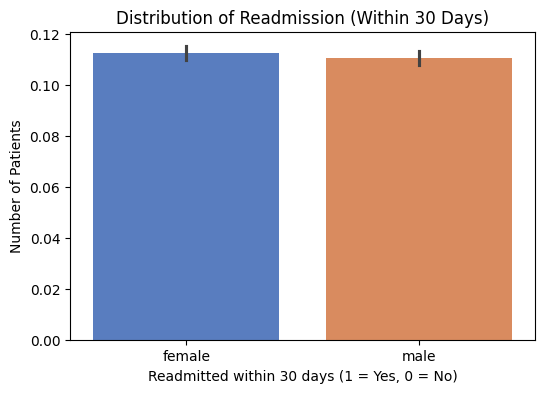

readmitted_binary
0    88.839755
1    11.160245
Name: proportion, dtype: float64


In [38]:
plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='readmitted_binary', data=df, hue='gender', palette='muted', legend=False)

plt.title('Distribution of Readmission (Within 30 Days)')
plt.xlabel('Readmitted within 30 days (1 = Yes, 0 = No)')
plt.ylabel('Number of Patients')
plt.show()

print(df['readmitted_binary'].value_counts(normalize=True) * 100)


C:\Users\Santhosh\AppData\Local\Temp\ipykernel_19672\2058312008.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='readmitted_binary', data=df, palette='muted', legend=False)


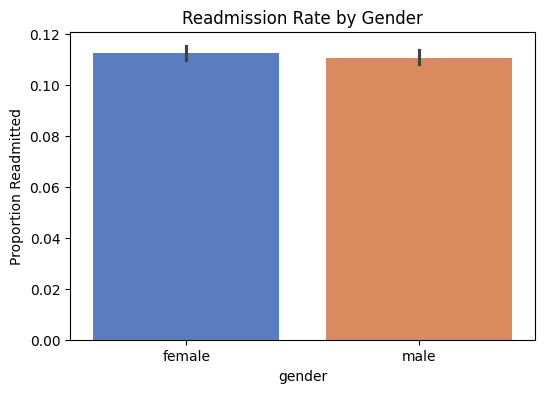

In [39]:
plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='readmitted_binary', data=df, palette='muted', legend=False)
plt.title('Readmission Rate by Gender')
plt.ylabel('Proportion Readmitted')
plt.show()


C:\Users\Santhosh\AppData\Local\Temp\ipykernel_19672\693087840.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='race', y='readmitted_binary', data=df, palette='cool')


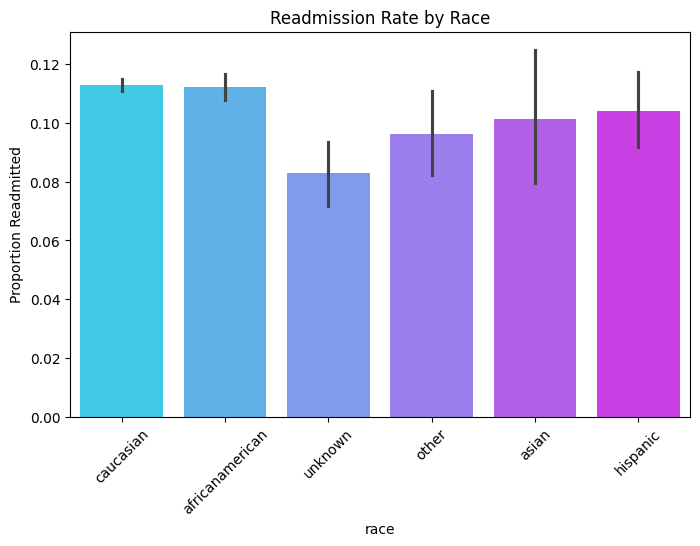

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(x='race', y='readmitted_binary', data=df, palette='cool')
plt.title('Readmission Rate by Race')
plt.xticks(rotation=45)
plt.ylabel('Proportion Readmitted')
plt.show()


C:\Users\Santhosh\AppData\Local\Temp\ipykernel_19672\413095574.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='readmitted_binary', y='age', data=df, palette='pastel', legend=False)


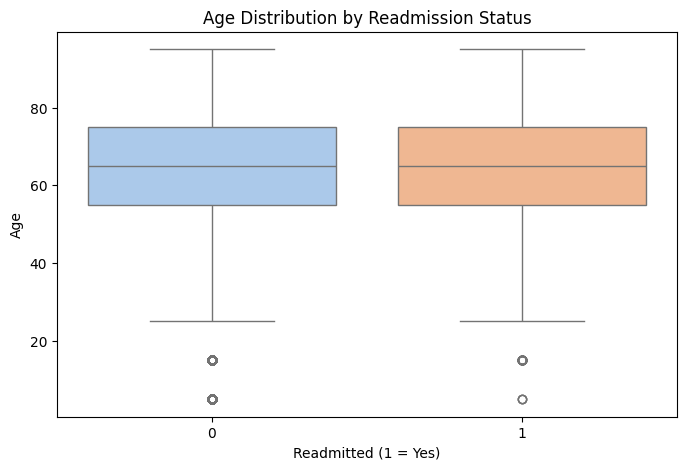

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(x='readmitted_binary', y='age', data=df, palette='pastel', legend=False)
plt.title('Age Distribution by Readmission Status')
plt.xlabel('Readmitted (1 = Yes)')
plt.ylabel('Age')
plt.show()


C:\Users\Santhosh\AppData\Local\Temp\ipykernel_19672\476942865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='readmitted_binary', y='time_in_hospital', data=df, palette='viridis')


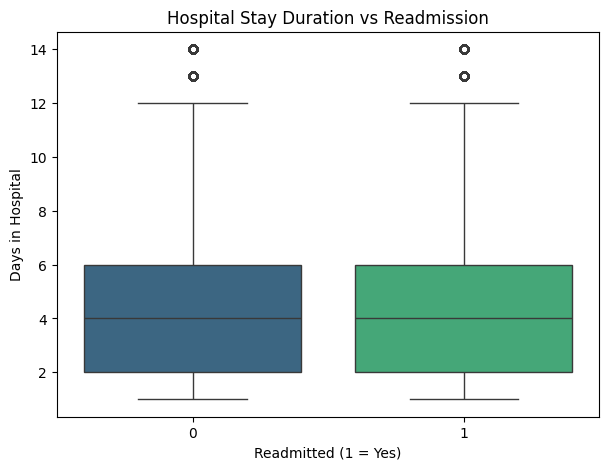

In [30]:
plt.figure(figsize=(7,5))
sns.boxplot(x='readmitted_binary', y='time_in_hospital', data=df, palette='viridis')
plt.title('Hospital Stay Duration vs Readmission')
plt.xlabel('Readmitted (1 = Yes)')
plt.ylabel('Days in Hospital')
plt.show()


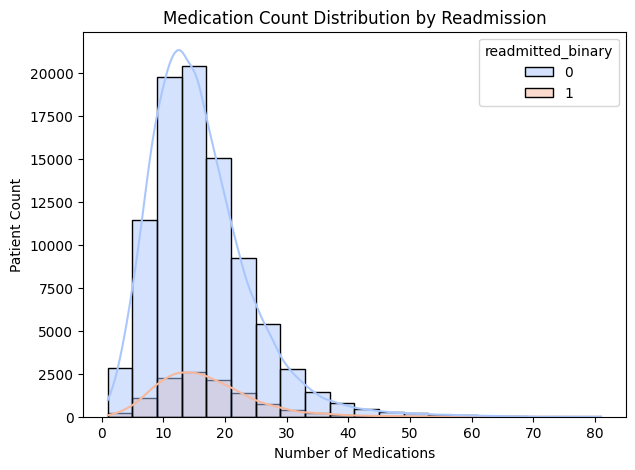

In [31]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='num_medications', hue='readmitted_binary', bins=20, kde=True, palette='coolwarm')
plt.title('Medication Count Distribution by Readmission')
plt.xlabel('Number of Medications')
plt.ylabel('Patient Count')
plt.show()


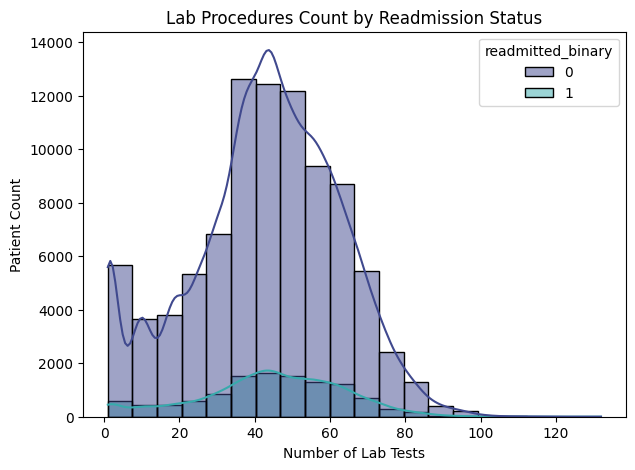

In [32]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='num_lab_procedures', hue='readmitted_binary', bins=20, kde=True, palette='mako')
plt.title('Lab Procedures Count by Readmission Status')
plt.xlabel('Number of Lab Tests')
plt.ylabel('Patient Count')
plt.show()


C:\Users\Santhosh\AppData\Local\Temp\ipykernel_19672\3279055871.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='diag_1', y='readmitted_binary', data=filtered, palette='crest')


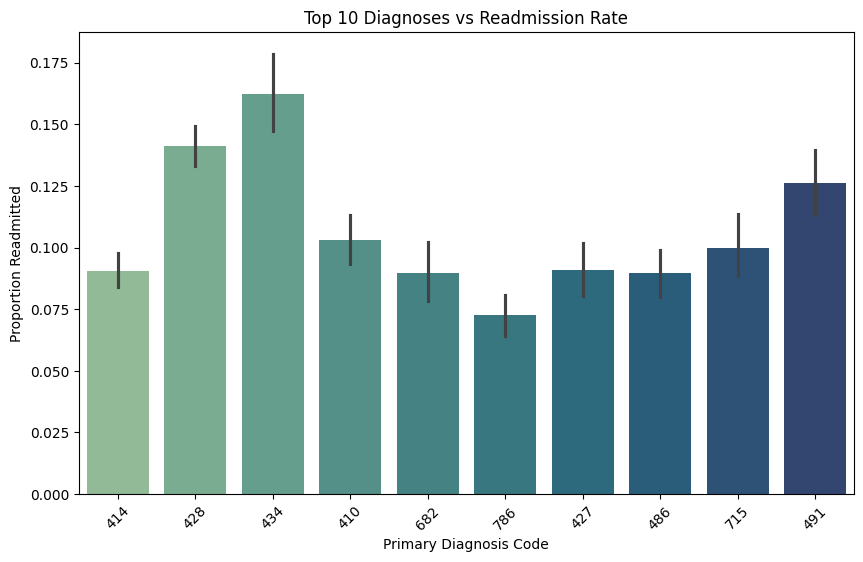

In [33]:
# Use diagnosis_1 column (main diagnosis)
top_diag = df['diag_1'].value_counts().head(10)
top_diag_names = top_diag.index.tolist()

# Filter data for top diagnoses
filtered = df[df['diag_1'].isin(top_diag_names)]

plt.figure(figsize=(10,6))
sns.barplot(x='diag_1', y='readmitted_binary', data=filtered, palette='crest')
plt.title('Top 10 Diagnoses vs Readmission Rate')
plt.xlabel('Primary Diagnosis Code')
plt.ylabel('Proportion Readmitted')
plt.xticks(rotation=45)
plt.show()


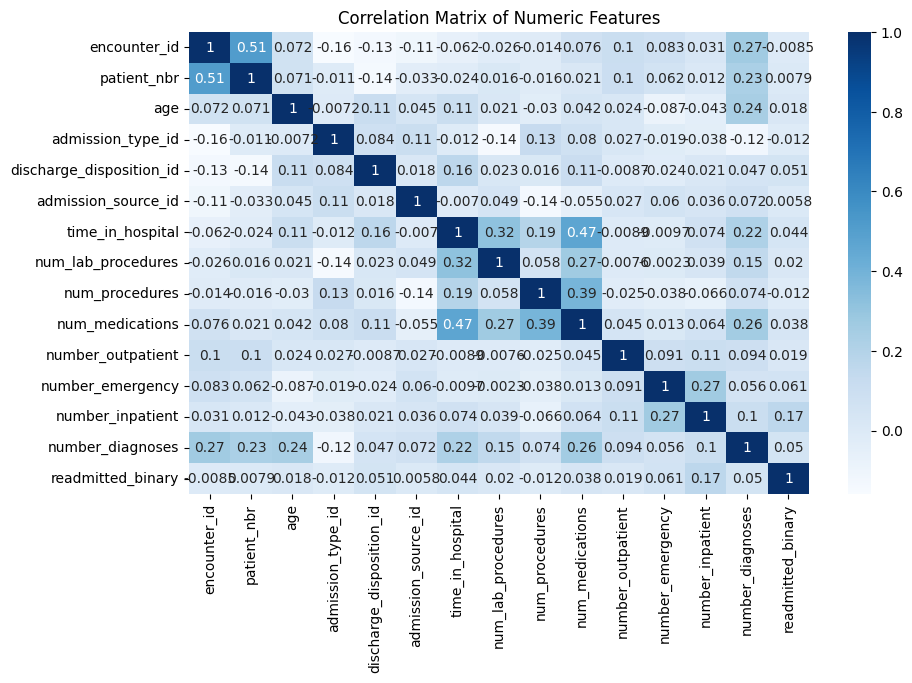

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [36]:
df[['age', 'gender', 'race', 'time_in_hospital', 'num_medications', 'readmitted_binary']].to_csv('eda_summary.csv', index=False)
print("EDA summary exported successfully!")


EDA summary exported successfully!


In [3]:
import pandas as pd

# Load your cleaned dataset
df = pd.read_csv('cleaned_diabetic_data.csv')

# Replace NaN or 'nan' strings in readmitted_binary with 0
df['readmitted_binary'] = df['readmitted_binary'].fillna(0)

# Ensure it's integer type
df['readmitted_binary'] = df['readmitted_binary'].astype(int)

# Save the cleaned version again
df.to_csv('cleaned_diabetic_data_final.csv', index=False)

print("✅ New file saved as cleaned_diabetic_data_final.csv (no NaN values).")


✅ New file saved as cleaned_diabetic_data_final.csv (no NaN values).


In [4]:
import pandas as pd
import numpy as np

# Load the last version you saved
df = pd.read_csv("cleaned_diabetic_data_final.csv")

# Replace blank strings or NaN with 0 in readmitted_binary
df['readmitted_binary'] = df['readmitted_binary'].replace('', np.nan)
df['readmitted_binary'] = df['readmitted_binary'].fillna(0).astype(int)

# Optional: verify only 0/1 now exist
print(df['readmitted_binary'].unique())

# Save a new clean file
df.to_csv("cleaned_diabetic_data_final2.csv", index=False)
print("✅ File saved: cleaned_diabetic_data_final2.csv (no blanks or NaN values)")


[0 1]
✅ File saved: cleaned_diabetic_data_final2.csv (no blanks or NaN values)


In [5]:
import pandas as pd
import numpy as np

# 1. Load the last file
df = pd.read_csv("cleaned_diabetic_data_final2.csv")

# 2. Force blanks, spaces, NaN, and strings like 'nan' → 0
df['readmitted_binary'] = (
    df['readmitted_binary']
    .replace(['', ' ', 'nan', np.nan], 0)
    .astype(int)
)

# 3. Double-check only 0/1 exist
print(df['readmitted_binary'].unique())

# 4. Save a brand-new clean file
df.to_csv("cleaned_diabetic_data_final3.csv", index=False)
print("✅ saved cleaned_diabetic_data_final3.csv — no blanks or NaN values")


[0 1]
✅ saved cleaned_diabetic_data_final3.csv — no blanks or NaN values


In [6]:
import pandas as pd
import numpy as np

# Load the uploaded file (adjust path if needed)
df = pd.read_csv("cleaned_diabetic_data_final3.csv", dtype=str)

# Ensure the column exists
print("Columns:", df.columns.tolist())

# Replace blanks, spaces, 'nan', or NaN with '0'
df['readmitted_binary'] = (
    df['readmitted_binary']
    .replace(['', ' ', 'nan', 'NaN', np.nan], '0')
    .astype(int)
)

# Confirm only 0 and 1 exist
print("Unique values:", df['readmitted_binary'].unique())

# Save the new final version
df.to_csv("cleaned_diabetic_data_final_FIXED.csv", index=False)
print("✅ File cleaned and saved successfully as cleaned_diabetic_data_final_FIXED.csv")


Columns: ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'readmitted_binary']
Unique values: [0 1]
✅ File cleaned and saved successfully as cleaned_diabetic_data_final_FIXED.csv


In [7]:
import pandas as pd

df = pd.read_csv("cleaned_diabetic_data_final_FIXED.csv")
print("Number of columns:", len(df.columns))
print(df.columns.tolist())


Number of columns: 48
['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'readmitted_binary']
